In [1]:
import numpy as np
import pandas as pd

#importam datasetul nostru
input_file = "Dataset.csv"

#citim din csv si punem in data
data = pd.read_csv(input_file, header = 0)
data.head()

,No.,Country,Date,Confirmed,Death,newConfirmed,newDeath
0,1,Romania,2019-12-31,0,0,0,0
1,2,Romania,2020-01-01,0,0,0,0
2,3,Romania,2020-01-02,0,0,0,0
3,4,Romania,2020-01-03,0,0,0,0
4,5,Romania,2020-01-04,0,0,0,0


In [2]:
#Stergem coloana cu numarul deoarece nu avem nevoie de ele in prelucrarea datelor
data = data.drop(data.columns[0], axis=1)
data

,Country,Date,Confirmed,Death,newConfirmed,newDeath
0,Romania,2019-12-31,0,0,0,0
1,Romania,2020-01-01,0,0,0,0
2,Romania,2020-01-02,0,0,0,0
3,Romania,2020-01-03,0,0,0,0
4,Romania,2020-01-04,0,0,0,0
...,...,...,...,...,...,...
116,Romania,2020-04-25,10635,601,218,34
117,Romania,2020-04-26,11036,619,401,18
118,Romania,2020-04-27,11339,641,303,22
119,Romania,2020-04-28,11616,663,277,22


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#folosim un label encoder pentru coloanele country si date pentru a le putea transforma in valori numerice
le = preprocessing.LabelEncoder()

le.fit(data['Date'])
data.loc[:, 'Date'] = le.transform(data['Date'])

le.fit(data['Country'])
data.loc[:, 'Country'] = le.transform(data['Country'])

#punem in y doar Country si Date
y = data.drop(data.columns[2], axis=1)
y = y.drop(y.columns[2], axis=1)
y = y.drop(y.columns[2], axis=1)
y = y.drop(y.columns[2], axis=1)

#In X_final punem restul coloanelor
X_final = data.drop(data.columns[1], axis=1)
X_final = X_final.drop(X_final.columns[0], axis=1)

y_train, y_test, X_train, X_test = train_test_split(X_final, y, test_size=0.17)

In [4]:
#X_train contine datele de train pentru input
X_train

,Country,Date
31,0,31
44,0,44
40,0,40
24,0,24
97,0,97
...,...,...
91,0,91
103,0,103
4,0,4
36,0,36


In [5]:
#y_train contine datele de train pentru rezultatul inputului
y_train

,Confirmed,Death,newConfirmed,newDeath
31,0,0,0,0
44,0,0,0,0
40,0,0,0,0
24,0,0,0,0
97,4057,176,193,25
...,...,...,...,...
91,2245,82,136,17
103,6300,316,310,25
4,0,0,0,0
36,0,0,0,0


In [6]:
#X_test contine datele de input pentru test
X_test

,Country,Date
19,0,19
51,0,51
84,0,84
108,0,108
20,0,20
92,0,92
107,0,107
102,0,102
116,0,116
60,0,60


In [7]:
#y_test contine datele rezultate in urma inputului de test
y_test

,Confirmed,Death,newConfirmed,newDeath
19,0,0,0,0
51,0,0,0,0
84,794,11,218,4
108,8067,411,360,19
20,0,0,0,0
92,2460,92,215,10
107,7707,392,491,20
102,5990,291,523,21
116,10635,601,218,34
60,3,0,0,0


In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

#folosim MLP regressor pentru predictii
#MLP Regressor pentru NN Multy Layer
regr = MLPRegressor(solver='adam', hidden_layer_sizes=(200,100), max_iter=10000, verbose = 'true',activation='relu')

#Antrenam modelul folosind setul de train
regr.fit(X_train, y_train)

#Facem predictii folosind setul de test
y_pred = regr.predict(X_test)

Iteration 1, loss = 1839576.52382839
Iteration 2, loss = 1835705.17493724
Iteration 3, loss = 1832167.65345703
Iteration 4, loss = 1828860.47253918
Iteration 5, loss = 1825608.12058476
Iteration 6, loss = 1822586.61318607
Iteration 7, loss = 1819599.25877494
Iteration 8, loss = 1816579.41308579
Iteration 9, loss = 1813590.05694228
Iteration 10, loss = 1810681.72753734
Iteration 11, loss = 1807937.99214857
Iteration 12, loss = 1805364.68736434
Iteration 13, loss = 1802853.20216062
Iteration 14, loss = 1800273.05631136
Iteration 15, loss = 1797636.74221220
Iteration 16, loss = 1794925.65643179
Iteration 17, loss = 1792185.82949955
Iteration 18, loss = 1789386.53445071
Iteration 19, loss = 1786547.88836348
Iteration 20, loss = 1783600.52546629
Iteration 21, loss = 1780615.30970590
Iteration 22, loss = 1777534.35260283
Iteration 23, loss = 1774354.05833270
Iteration 24, loss = 1771070.89103991
Iteration 25, loss = 1767694.84758094
Iteration 26, loss = 1764208.62735806
Iteration 27, loss = 

Iteration 342, loss = 817968.32283220
Iteration 343, loss = 817713.57251465
Iteration 344, loss = 817458.29323875
Iteration 345, loss = 817202.65473590
Iteration 346, loss = 816946.17342210
Iteration 347, loss = 816687.75998390
Iteration 348, loss = 816446.06754274
Iteration 349, loss = 816169.76280792
Iteration 350, loss = 815909.95532474
Iteration 351, loss = 815646.28678313
Iteration 352, loss = 815381.33423895
Iteration 353, loss = 815117.26012114
Iteration 354, loss = 814852.91588316
Iteration 355, loss = 814586.08131135
Iteration 356, loss = 814315.63385926
Iteration 357, loss = 814045.02551269
Iteration 358, loss = 813775.33602063
Iteration 359, loss = 813506.00376414
Iteration 360, loss = 813235.05308731
Iteration 361, loss = 812959.27041200
Iteration 362, loss = 812681.64760123
Iteration 363, loss = 812405.46598002
Iteration 364, loss = 812129.79694320
Iteration 365, loss = 811851.51982275
Iteration 366, loss = 811570.07997576
Iteration 367, loss = 811287.89772498
Iteration 36

Iteration 691, loss = 664273.81383488
Iteration 692, loss = 663716.15143339
Iteration 693, loss = 663191.58266611
Iteration 694, loss = 662616.42159015
Iteration 695, loss = 662067.37231060
Iteration 696, loss = 661504.82255739
Iteration 697, loss = 660957.84878177
Iteration 698, loss = 660404.14380966
Iteration 699, loss = 659852.59224834
Iteration 700, loss = 659314.70853586
Iteration 701, loss = 658817.70369697
Iteration 702, loss = 658231.51234660
Iteration 703, loss = 657761.64471844
Iteration 704, loss = 657150.28524429
Iteration 705, loss = 656633.27304763
Iteration 706, loss = 656033.69799845
Iteration 707, loss = 655719.19169511
Iteration 708, loss = 655321.92318633
Iteration 709, loss = 654895.73012791
Iteration 710, loss = 654153.14909358
Iteration 711, loss = 653380.09136641
Iteration 712, loss = 652830.02644068
Iteration 713, loss = 652279.54192729
Iteration 714, loss = 651770.28212835
Iteration 715, loss = 651228.50195149
Iteration 716, loss = 650735.52225642
Iteration 71

Iteration 1024, loss = 518547.94110314
Iteration 1025, loss = 518273.02945785
Iteration 1026, loss = 517998.55796928
Iteration 1027, loss = 517724.89821889
Iteration 1028, loss = 517451.09206825
Iteration 1029, loss = 517178.30340095
Iteration 1030, loss = 516908.66548885
Iteration 1031, loss = 516637.58144370
Iteration 1032, loss = 516363.73504928
Iteration 1033, loss = 516095.00499926
Iteration 1034, loss = 515827.90545438
Iteration 1035, loss = 515562.17750425
Iteration 1036, loss = 515315.19282541
Iteration 1037, loss = 515026.83166361
Iteration 1038, loss = 514758.95586686
Iteration 1039, loss = 514494.89424247
Iteration 1040, loss = 514237.20699219
Iteration 1041, loss = 513973.65558538
Iteration 1042, loss = 513709.47777971
Iteration 1043, loss = 513466.80890616
Iteration 1044, loss = 513183.76173832
Iteration 1045, loss = 512925.04124727
Iteration 1046, loss = 512663.64125383
Iteration 1047, loss = 512408.00341046
Iteration 1048, loss = 512148.04968143
Iteration 1049, loss = 51

Iteration 1339, loss = 436291.95343163
Iteration 1340, loss = 435960.16727871
Iteration 1341, loss = 435695.92714167
Iteration 1342, loss = 435489.46474942
Iteration 1343, loss = 435045.25028342
Iteration 1344, loss = 434928.86841617
Iteration 1345, loss = 434553.06905548
Iteration 1346, loss = 434199.00139535
Iteration 1347, loss = 433970.20774797
Iteration 1348, loss = 433502.33029530
Iteration 1349, loss = 433302.49725766
Iteration 1350, loss = 432880.19649952
Iteration 1351, loss = 432703.40972741
Iteration 1352, loss = 432317.53685627
Iteration 1353, loss = 432014.91789315
Iteration 1354, loss = 431698.03305487
Iteration 1355, loss = 431356.54193080
Iteration 1356, loss = 431075.88452032
Iteration 1357, loss = 430714.38409269
Iteration 1358, loss = 430486.78862484
Iteration 1359, loss = 430114.59074719
Iteration 1360, loss = 429787.25197427
Iteration 1361, loss = 429488.67032860
Iteration 1362, loss = 429141.78657076
Iteration 1363, loss = 428853.56999240
Iteration 1364, loss = 42

Iteration 1668, loss = 309135.06326658
Iteration 1669, loss = 308826.00007501
Iteration 1670, loss = 308322.74645389
Iteration 1671, loss = 307832.47412139
Iteration 1672, loss = 307485.82704468
Iteration 1673, loss = 306932.15889193
Iteration 1674, loss = 306541.61968973
Iteration 1675, loss = 306074.92333211
Iteration 1676, loss = 305605.64925101
Iteration 1677, loss = 305194.74698073
Iteration 1678, loss = 304709.52476089
Iteration 1679, loss = 304309.32332877
Iteration 1680, loss = 303833.45974517
Iteration 1681, loss = 303386.63230922
Iteration 1682, loss = 302961.27447946
Iteration 1683, loss = 302478.85406263
Iteration 1684, loss = 302041.10587962
Iteration 1685, loss = 301600.66795452
Iteration 1686, loss = 301132.88522987
Iteration 1687, loss = 300695.14320056
Iteration 1688, loss = 300240.79559796
Iteration 1689, loss = 299783.26689022
Iteration 1690, loss = 299335.13094237
Iteration 1691, loss = 298886.84746447
Iteration 1692, loss = 298436.44107351
Iteration 1693, loss = 29

Iteration 2016, loss = 158367.34651201
Iteration 2017, loss = 157986.42980931
Iteration 2018, loss = 157596.79989940
Iteration 2019, loss = 157194.81879227
Iteration 2020, loss = 156806.54283016
Iteration 2021, loss = 156430.53990044
Iteration 2022, loss = 156083.06293244
Iteration 2023, loss = 155749.00290834
Iteration 2024, loss = 155389.95755622
Iteration 2025, loss = 154984.77756395
Iteration 2026, loss = 154572.25995496
Iteration 2027, loss = 154184.38840563
Iteration 2028, loss = 153824.81805600
Iteration 2029, loss = 153485.12991587
Iteration 2030, loss = 153125.63535365
Iteration 2031, loss = 152732.59378663
Iteration 2032, loss = 152333.18022377
Iteration 2033, loss = 151950.81598896
Iteration 2034, loss = 151582.27943364
Iteration 2035, loss = 151213.01062454
Iteration 2036, loss = 150845.17003467
Iteration 2037, loss = 150474.84534786
Iteration 2038, loss = 150101.14076825
Iteration 2039, loss = 149732.06716213
Iteration 2040, loss = 149365.04290844
Iteration 2041, loss = 14

Iteration 2367, loss = 58020.60122822
Iteration 2368, loss = 57838.20595009
Iteration 2369, loss = 57656.95221027
Iteration 2370, loss = 57473.40125513
Iteration 2371, loss = 57298.28086579
Iteration 2372, loss = 57125.00025304
Iteration 2373, loss = 56969.33389758
Iteration 2374, loss = 56807.82056191
Iteration 2375, loss = 56658.92860350
Iteration 2376, loss = 56510.77060081
Iteration 2377, loss = 56368.88190912
Iteration 2378, loss = 56205.25877975
Iteration 2379, loss = 56007.53437976
Iteration 2380, loss = 55750.13229603
Iteration 2381, loss = 55486.09484538
Iteration 2382, loss = 55230.62100127
Iteration 2383, loss = 55027.52593365
Iteration 2384, loss = 54872.10483692
Iteration 2385, loss = 54732.92304772
Iteration 2386, loss = 54596.42731392
Iteration 2387, loss = 54412.88851605
Iteration 2388, loss = 54204.71838368
Iteration 2389, loss = 53978.06620451
Iteration 2390, loss = 53770.18768108
Iteration 2391, loss = 53596.19404830
Iteration 2392, loss = 53443.00736863
Iteration 23

Iteration 2708, loss = 17426.21626938
Iteration 2709, loss = 17349.54805384
Iteration 2710, loss = 17271.26450287
Iteration 2711, loss = 17192.02869646
Iteration 2712, loss = 17115.43442545
Iteration 2713, loss = 17042.23119449
Iteration 2714, loss = 16973.49968155
Iteration 2715, loss = 16908.19188941
Iteration 2716, loss = 16845.93028141
Iteration 2717, loss = 16786.14615408
Iteration 2718, loss = 16728.28839314
Iteration 2719, loss = 16672.31757464
Iteration 2720, loss = 16616.77733413
Iteration 2721, loss = 16562.77537174
Iteration 2722, loss = 16508.54621137
Iteration 2723, loss = 16455.74820965
Iteration 2724, loss = 16401.82845850
Iteration 2725, loss = 16349.59271983
Iteration 2726, loss = 16293.04935025
Iteration 2727, loss = 16236.16538901
Iteration 2728, loss = 16174.84255739
Iteration 2729, loss = 16112.75183655
Iteration 2730, loss = 16044.59624959
Iteration 2731, loss = 15976.36398234
Iteration 2732, loss = 15903.53408886
Iteration 2733, loss = 15830.40761715
Iteration 27

Iteration 3043, loss = 4760.69909104
Iteration 3044, loss = 4700.91345310
Iteration 3045, loss = 4660.62640731
Iteration 3046, loss = 4645.46160217
Iteration 3047, loss = 4647.52283199
Iteration 3048, loss = 4651.34032636
Iteration 3049, loss = 4643.27187749
Iteration 3050, loss = 4619.29150456
Iteration 3051, loss = 4583.26775020
Iteration 3052, loss = 4546.44388490
Iteration 3053, loss = 4517.29369240
Iteration 3054, loss = 4499.45789202
Iteration 3055, loss = 4489.96709229
Iteration 3056, loss = 4482.33470961
Iteration 3057, loss = 4471.54042599
Iteration 3058, loss = 4453.31854188
Iteration 3059, loss = 4429.01813030
Iteration 3060, loss = 4402.97237716
Iteration 3061, loss = 4379.51686417
Iteration 3062, loss = 4360.80077202
Iteration 3063, loss = 4346.03355278
Iteration 3064, loss = 4333.26215383
Iteration 3065, loss = 4320.07788582
Iteration 3066, loss = 4304.89103476
Iteration 3067, loss = 4286.73441011
Iteration 3068, loss = 4266.80801454
Iteration 3069, loss = 4246.70001655
I

In [9]:
#Convertim datele din float in int
result_int = []
for x in y_pred:
    result_int.append(x.astype(int))

result_int

[array([-60,  -5,  -5,   0]),
 array([-31,   7,   4,   0]),
 array([742,  -7, 151,  10]),
 array([7976,  426,  323,   21]),
 array([-59,  -5,  -5,   0]),
 array([2872,   97,  241,   13]),
 array([7657,  405,  318,   20]),
 array([6062,  302,  292,   18]),
 array([10527,   590,   364,    24]),
 array([-25,  10,   9,   0]),
 array([-42,   2,   0,   0]),
 array([-22,  12,  11,   0]),
 array([-67, -12,  -9,   0]),
 array([2234,   55,  231,   12]),
 array([-54,  -2,  -3,   0]),
 array([-70, -12,  -9,   0]),
 array([6700,  343,  302,   19]),
 array([-69, -12,  -9,   0]),
 array([-49,   0,  -2,   0]),
 array([-58,  -4,  -5,   0]),
 array([-68, -12,  -9,   0])]

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Folosim diferite scalere pentru a puteam face operatii de normalizare, standardizare si scalare
std_scaler = StandardScaler() 
std_scaler2 = StandardScaler()
minMaxScaler = MinMaxScaler()

In [11]:
minMaxScaler.fit(X_train)  
X_train = minMaxScaler.transform(X_train)  

#Normalizam si scalam setul de train
std_scaler.fit(X_train)  
X_train = std_scaler.transform(X_train) 
std_scaler2.fit(X_train)  
X_train = std_scaler2.transform(X_train) 

In [12]:
#Normalizam si scalam setul de test
minMaxScaler.fit(X_test) 
X_test = minMaxScaler.transform(X_test)  
std_scaler.fit(X_test) 
X_test = std_scaler.transform(X_test)  

In [13]:
#Scalam si standardizam datele de test
std_scaler2.fit(X_test) 
X_test = std_scaler2.transform(X_test)  

In [14]:
#Antrenam modeul folosind setul de train
regr.fit(X_train, y_train)

#Facem predictii
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Iteration 1, loss = 1835595.19163764
Iteration 2, loss = 1835543.57389179
Iteration 3, loss = 1835493.18193466
Iteration 4, loss = 1835443.96044343
Iteration 5, loss = 1835396.15659576
Iteration 6, loss = 1835353.21879957
Iteration 7, loss = 1835312.25028738
Iteration 8, loss = 1835271.99964443
Iteration 9, loss = 1835230.61751008
Iteration 10, loss = 1835188.88974233
Iteration 11, loss = 1835147.41810403
Iteration 12, loss = 1835105.55712800
Iteration 13, loss = 1835063.04985237
Iteration 14, loss = 1835019.18716525
Iteration 15, loss = 1834973.68727514
Iteration 16, loss = 1834926.36886312
Iteration 17, loss = 1834876.86238443
Iteration 18, loss = 1834825.29482847
Iteration 19, loss = 1834771.75491448
Iteration 20, loss = 1834716.18819223
Iteration 21, loss = 1834658.43353300
Iteration 22, loss = 1834598.38433547
Iteration 23, loss = 1834535.92485222
Iteration 24, loss = 1834470.91832159
Iteration 25, loss = 1834403.21961062
Iteration 26, loss = 1834332.71685032
Iteration 27, loss = 

Iteration 301, loss = 1112255.52625150
Iteration 302, loss = 1106501.22923062
Iteration 303, loss = 1100732.32584993
Iteration 304, loss = 1094955.77232877
Iteration 305, loss = 1089172.54409462
Iteration 306, loss = 1083384.09987434
Iteration 307, loss = 1077589.95050496
Iteration 308, loss = 1071791.90327662
Iteration 309, loss = 1065989.63469143
Iteration 310, loss = 1060184.81566336
Iteration 311, loss = 1054377.23230747
Iteration 312, loss = 1048567.58940631
Iteration 313, loss = 1042756.76912827
Iteration 314, loss = 1036944.99715757
Iteration 315, loss = 1031132.24598683
Iteration 316, loss = 1025320.95287720
Iteration 317, loss = 1019508.68377788
Iteration 318, loss = 1013698.66839541
Iteration 319, loss = 1007891.81145355
Iteration 320, loss = 1002087.19759884
Iteration 321, loss = 996287.21092259
Iteration 322, loss = 990490.83708192
Iteration 323, loss = 984698.85733389
Iteration 324, loss = 978910.52872664
Iteration 325, loss = 973127.82483428
Iteration 326, loss = 967350.6

Iteration 638, loss = 171208.37481049
Iteration 639, loss = 170480.09334879
Iteration 640, loss = 169754.01007729
Iteration 641, loss = 169031.77796217
Iteration 642, loss = 168312.41070590
Iteration 643, loss = 167595.51965717
Iteration 644, loss = 166881.39283955
Iteration 645, loss = 166169.43669257
Iteration 646, loss = 165461.48367116
Iteration 647, loss = 164756.72098510
Iteration 648, loss = 164055.77884167
Iteration 649, loss = 163358.03434726
Iteration 650, loss = 162660.92766221
Iteration 651, loss = 161967.03660139
Iteration 652, loss = 161275.84741067
Iteration 653, loss = 160587.88928965
Iteration 654, loss = 159903.97491566
Iteration 655, loss = 159221.63947151
Iteration 656, loss = 158541.16132346
Iteration 657, loss = 157863.81385648
Iteration 658, loss = 157190.19708625
Iteration 659, loss = 156520.48484844
Iteration 660, loss = 155854.63508139
Iteration 661, loss = 155193.07592131
Iteration 662, loss = 154535.43035464
Iteration 663, loss = 153878.89175593
Iteration 66

Iteration 962, loss = 44854.67385152
Iteration 963, loss = 44677.53636074
Iteration 964, loss = 44500.76351639
Iteration 965, loss = 44324.34289246
Iteration 966, loss = 44148.34820869
Iteration 967, loss = 43972.50684787
Iteration 968, loss = 43797.17866512
Iteration 969, loss = 43623.58496577
Iteration 970, loss = 43450.64843023
Iteration 971, loss = 43279.42558491
Iteration 972, loss = 43110.07418830
Iteration 973, loss = 42941.88931735
Iteration 974, loss = 42774.26276030
Iteration 975, loss = 42608.04902522
Iteration 976, loss = 42442.21199698
Iteration 977, loss = 42277.58082112
Iteration 978, loss = 42113.78486798
Iteration 979, loss = 41950.28556964
Iteration 980, loss = 41787.00932665
Iteration 981, loss = 41624.18366479
Iteration 982, loss = 41461.93310783
Iteration 983, loss = 41300.35796352
Iteration 984, loss = 41139.60169026
Iteration 985, loss = 40979.65848373
Iteration 986, loss = 40820.37256270
Iteration 987, loss = 40661.96169156
Iteration 988, loss = 40504.00466305
I

Iteration 1292, loss = 12841.67192828
Iteration 1293, loss = 12793.89973934
Iteration 1294, loss = 12746.29406312
Iteration 1295, loss = 12698.88006890
Iteration 1296, loss = 12651.85446860
Iteration 1297, loss = 12605.19952169
Iteration 1298, loss = 12558.77305103
Iteration 1299, loss = 12512.77268151
Iteration 1300, loss = 12467.06084984
Iteration 1301, loss = 12421.64534648
Iteration 1302, loss = 12376.18281184
Iteration 1303, loss = 12330.85352687
Iteration 1304, loss = 12285.49790129
Iteration 1305, loss = 12240.97079754
Iteration 1306, loss = 12196.67427712
Iteration 1307, loss = 12152.48251200
Iteration 1308, loss = 12108.52532423
Iteration 1309, loss = 12064.99403003
Iteration 1310, loss = 12021.85602510
Iteration 1311, loss = 11978.81286135
Iteration 1312, loss = 11935.85147043
Iteration 1313, loss = 11893.13984249
Iteration 1314, loss = 11850.49877695
Iteration 1315, loss = 11808.23341036
Iteration 1316, loss = 11766.47272459
Iteration 1317, loss = 11724.87840360
Iteration 13

Iteration 1626, loss = 4291.64798741
Iteration 1627, loss = 4279.81201057
Iteration 1628, loss = 4268.06401849
Iteration 1629, loss = 4256.36608189
Iteration 1630, loss = 4244.72843633
Iteration 1631, loss = 4233.07995243
Iteration 1632, loss = 4221.47843810
Iteration 1633, loss = 4209.92496091
Iteration 1634, loss = 4198.39736078
Iteration 1635, loss = 4186.89536782
Iteration 1636, loss = 4175.43651384
Iteration 1637, loss = 4164.01835551
Iteration 1638, loss = 4152.64094544
Iteration 1639, loss = 4141.26665934
Iteration 1640, loss = 4129.94414255
Iteration 1641, loss = 4118.66939315
Iteration 1642, loss = 4107.44368320
Iteration 1643, loss = 4096.25669540
Iteration 1644, loss = 4085.11262392
Iteration 1645, loss = 4074.02006914
Iteration 1646, loss = 4062.95945243
Iteration 1647, loss = 4051.92477271
Iteration 1648, loss = 4040.92902952
Iteration 1649, loss = 4030.00179268
Iteration 1650, loss = 4019.09727435
Iteration 1651, loss = 4008.23288068
Iteration 1652, loss = 3997.37620562
I

Iteration 1967, loss = 1920.92287796
Iteration 1968, loss = 1916.93817605
Iteration 1969, loss = 1912.96736572
Iteration 1970, loss = 1909.01020385
Iteration 1971, loss = 1905.06737384
Iteration 1972, loss = 1901.13849941
Iteration 1973, loss = 1897.22335835
Iteration 1974, loss = 1893.32229407
Iteration 1975, loss = 1889.43041504
Iteration 1976, loss = 1885.54415690
Iteration 1977, loss = 1881.67061792
Iteration 1978, loss = 1877.80936367
Iteration 1979, loss = 1873.96105871
Iteration 1980, loss = 1870.12541926
Iteration 1981, loss = 1866.30379286
Iteration 1982, loss = 1862.49750457
Iteration 1983, loss = 1858.70704915
Iteration 1984, loss = 1854.92221909
Iteration 1985, loss = 1851.13321280
Iteration 1986, loss = 1847.35526926
Iteration 1987, loss = 1843.59047203
Iteration 1988, loss = 1839.85244131
Iteration 1989, loss = 1836.13062844
Iteration 1990, loss = 1832.41528393
Iteration 1991, loss = 1828.71013614
Iteration 1992, loss = 1825.01436381
Iteration 1993, loss = 1821.32807625
I

Iteration 2308, loss = 1056.70291192
Iteration 2309, loss = 1055.21321761
Iteration 2310, loss = 1053.73229467
Iteration 2311, loss = 1052.26101822
Iteration 2312, loss = 1050.79490364
Iteration 2313, loss = 1049.33409752
Iteration 2314, loss = 1047.87851571
Iteration 2315, loss = 1046.42759219
Iteration 2316, loss = 1044.98185825
Iteration 2317, loss = 1043.54092583
Iteration 2318, loss = 1042.10452999
Iteration 2319, loss = 1040.67319562
Iteration 2320, loss = 1039.24649124
Iteration 2321, loss = 1037.82472796
Iteration 2322, loss = 1036.40741273
Iteration 2323, loss = 1034.99428426
Iteration 2324, loss = 1033.58627777
Iteration 2325, loss = 1032.18278005
Iteration 2326, loss = 1030.78374341
Iteration 2327, loss = 1029.38921996
Iteration 2328, loss = 1027.99912141
Iteration 2329, loss = 1026.61333887
Iteration 2330, loss = 1025.23335327
Iteration 2331, loss = 1023.85860655
Iteration 2332, loss = 1022.48366004
Iteration 2333, loss = 1021.09420971
Iteration 2334, loss = 1019.70659283
I

Iteration 2648, loss = 726.91133397
Iteration 2649, loss = 726.30009088
Iteration 2650, loss = 725.69019192
Iteration 2651, loss = 725.08210028
Iteration 2652, loss = 724.47584343
Iteration 2653, loss = 723.87103711
Iteration 2654, loss = 723.26767407
Iteration 2655, loss = 722.66602040
Iteration 2656, loss = 722.06625039
Iteration 2657, loss = 721.46798302
Iteration 2658, loss = 720.87115405
Iteration 2659, loss = 720.27611630
Iteration 2660, loss = 719.68244103
Iteration 2661, loss = 719.09062475
Iteration 2662, loss = 718.50037859
Iteration 2663, loss = 717.91162027
Iteration 2664, loss = 717.32451836
Iteration 2665, loss = 716.73510479
Iteration 2666, loss = 716.14455771
Iteration 2667, loss = 715.55470330
Iteration 2668, loss = 714.96576209
Iteration 2669, loss = 714.37800878
Iteration 2670, loss = 713.79134636
Iteration 2671, loss = 713.20574931
Iteration 2672, loss = 712.62130775
Iteration 2673, loss = 712.03825720
Iteration 2674, loss = 711.45620058
Iteration 2675, loss = 710.8

Iteration 2997, loss = 572.16510367
Iteration 2998, loss = 571.87303923
Iteration 2999, loss = 571.58158455
Iteration 3000, loss = 571.29074039
Iteration 3001, loss = 571.00065322
Iteration 3002, loss = 570.71116307
Iteration 3003, loss = 570.42240443
Iteration 3004, loss = 570.13388642
Iteration 3005, loss = 569.84552632
Iteration 3006, loss = 569.55796605
Iteration 3007, loss = 569.27095316
Iteration 3008, loss = 568.98429864
Iteration 3009, loss = 568.69834106
Iteration 3010, loss = 568.41284951
Iteration 3011, loss = 568.12748838
Iteration 3012, loss = 567.84131355
Iteration 3013, loss = 567.55551265
Iteration 3014, loss = 567.27051721
Iteration 3015, loss = 566.98627341
Iteration 3016, loss = 566.70262014
Iteration 3017, loss = 566.41956636
Iteration 3018, loss = 566.13764253
Iteration 3019, loss = 565.85677922
Iteration 3020, loss = 565.57709035
Iteration 3021, loss = 565.29839715
Iteration 3022, loss = 565.02061106
Iteration 3023, loss = 564.74325399
Iteration 3024, loss = 564.4

Iteration 3335, loss = 499.08443580
Iteration 3336, loss = 498.93447232
Iteration 3337, loss = 498.78463319
Iteration 3338, loss = 498.63566017
Iteration 3339, loss = 498.48724103
Iteration 3340, loss = 498.33879880
Iteration 3341, loss = 498.19101207
Iteration 3342, loss = 498.04386865
Iteration 3343, loss = 497.89677006
Iteration 3344, loss = 497.74963500
Iteration 3345, loss = 497.60315723
Iteration 3346, loss = 497.45705350
Iteration 3347, loss = 497.31152640
Iteration 3348, loss = 497.16591981
Iteration 3349, loss = 497.02128073
Iteration 3350, loss = 496.87705997
Iteration 3351, loss = 496.73282376
Iteration 3352, loss = 496.58903468
Iteration 3353, loss = 496.44569192
Iteration 3354, loss = 496.30249562
Iteration 3355, loss = 496.15979866
Iteration 3356, loss = 496.01738676
Iteration 3357, loss = 495.87566658
Iteration 3358, loss = 495.73400087
Iteration 3359, loss = 495.59278424
Iteration 3360, loss = 495.45187611
Iteration 3361, loss = 495.31133229
Iteration 3362, loss = 495.1

Iteration 3669, loss = 462.13985550
Iteration 3670, loss = 462.06176181
Iteration 3671, loss = 461.98353454
Iteration 3672, loss = 461.90560877
Iteration 3673, loss = 461.82831130
Iteration 3674, loss = 461.75113210
Iteration 3675, loss = 461.67407315
Iteration 3676, loss = 461.59684437
Iteration 3677, loss = 461.51930309
Iteration 3678, loss = 461.44172631
Iteration 3679, loss = 461.36356702
Iteration 3680, loss = 461.28462209
Iteration 3681, loss = 461.20542705
Iteration 3682, loss = 461.12629432
Iteration 3683, loss = 461.04786553
Iteration 3684, loss = 460.96981566
Iteration 3685, loss = 460.89216032
Iteration 3686, loss = 460.81579619
Iteration 3687, loss = 460.73965423
Iteration 3688, loss = 460.66331731
Iteration 3689, loss = 460.58702724
Iteration 3690, loss = 460.51105862
Iteration 3691, loss = 460.43441467
Iteration 3692, loss = 460.35799556
Iteration 3693, loss = 460.28220514
Iteration 3694, loss = 460.20638583
Iteration 3695, loss = 460.13061765
Iteration 3696, loss = 460.0

Iteration 4012, loss = 432.31296926
Iteration 4013, loss = 432.25858030
Iteration 4014, loss = 432.21980975
Iteration 4015, loss = 432.16905385
Iteration 4016, loss = 432.10673506
Iteration 4017, loss = 432.06580703
Iteration 4018, loss = 432.02248587
Iteration 4019, loss = 431.97642808
Iteration 4020, loss = 431.92682660
Iteration 4021, loss = 431.87471618
Iteration 4022, loss = 431.82052486
Iteration 4023, loss = 431.76411362
Iteration 4024, loss = 431.71907651
Iteration 4025, loss = 431.67491997
Iteration 4026, loss = 431.61858525
Iteration 4027, loss = 431.56653985
Iteration 4028, loss = 431.52252557
Iteration 4029, loss = 431.47580991
Iteration 4030, loss = 431.42637492
Iteration 4031, loss = 431.37465565
Iteration 4032, loss = 431.32121014
Iteration 4033, loss = 431.28018155
Iteration 4034, loss = 431.23352908
Iteration 4035, loss = 431.17485939
Iteration 4036, loss = 431.13275888
Iteration 4037, loss = 431.09097386
Iteration 4038, loss = 431.04586146
Iteration 4039, loss = 430.9

Iteration 4344, loss = 419.37109098
Iteration 4345, loss = 419.34330337
Iteration 4346, loss = 419.30720318
Iteration 4347, loss = 419.27745950
Iteration 4348, loss = 419.24485139
Iteration 4349, loss = 419.21329123
Iteration 4350, loss = 419.18151354
Iteration 4351, loss = 419.14899075
Iteration 4352, loss = 419.11627108
Iteration 4353, loss = 419.08432511
Iteration 4354, loss = 419.05159204
Iteration 4355, loss = 419.01900756
Iteration 4356, loss = 418.98618410
Iteration 4357, loss = 418.95367505
Iteration 4358, loss = 418.92104927
Iteration 4359, loss = 418.88851745
Iteration 4360, loss = 418.85610076
Iteration 4361, loss = 418.82375240
Iteration 4362, loss = 418.79207161
Iteration 4363, loss = 418.76629531
Iteration 4364, loss = 418.72808469
Iteration 4365, loss = 418.69695333
Iteration 4366, loss = 418.66527805
Iteration 4367, loss = 418.63385304
Iteration 4368, loss = 418.60224635
Iteration 4369, loss = 418.57113347
Iteration 4370, loss = 418.53923525
Iteration 4371, loss = 418.5

Iteration 4677, loss = 409.90106937
Iteration 4678, loss = 409.87393732
Iteration 4679, loss = 409.84721590
Iteration 4680, loss = 409.81992106
Iteration 4681, loss = 409.79283264
Iteration 4682, loss = 409.76693235
Iteration 4683, loss = 409.74057537
Iteration 4684, loss = 409.71426700
Iteration 4685, loss = 409.68766591
Iteration 4686, loss = 409.66076383
Iteration 4687, loss = 409.63381891
Iteration 4688, loss = 409.60733097
Iteration 4689, loss = 409.57982408
Iteration 4690, loss = 409.55337945
Iteration 4691, loss = 409.52835174
Iteration 4692, loss = 409.50169405
Iteration 4693, loss = 409.47418420
Iteration 4694, loss = 409.44777495
Iteration 4695, loss = 409.42194119
Iteration 4696, loss = 409.39501907
Iteration 4697, loss = 409.36968727
Iteration 4698, loss = 409.34283356
Iteration 4699, loss = 409.31623960
Iteration 4700, loss = 409.28926107
Iteration 4701, loss = 409.26177208
Iteration 4702, loss = 409.23590600
Iteration 4703, loss = 409.20951647
Iteration 4704, loss = 409.1

Iteration 5018, loss = 401.14759383
Iteration 5019, loss = 401.12362557
Iteration 5020, loss = 401.10104205
Iteration 5021, loss = 401.07863169
Iteration 5022, loss = 401.05439080
Iteration 5023, loss = 401.02845402
Iteration 5024, loss = 401.00334816
Iteration 5025, loss = 400.98048453
Iteration 5026, loss = 400.95601843
Iteration 5027, loss = 400.93200314
Iteration 5028, loss = 400.90710619
Iteration 5029, loss = 400.88376551
Iteration 5030, loss = 400.86141462
Iteration 5031, loss = 400.83856850
Iteration 5032, loss = 400.81255786
Iteration 5033, loss = 400.79024123
Iteration 5034, loss = 400.76759660
Iteration 5035, loss = 400.74361280
Iteration 5036, loss = 400.71930857
Iteration 5037, loss = 400.69448311
Iteration 5038, loss = 400.67056130
Iteration 5039, loss = 400.64850892
Iteration 5040, loss = 400.62677515
Iteration 5041, loss = 400.60237048
Iteration 5042, loss = 400.57862598
Iteration 5043, loss = 400.55535987
Iteration 5044, loss = 400.53201291
Iteration 5045, loss = 400.5

Iteration 5359, loss = 393.63957141
Iteration 5360, loss = 393.61930822
Iteration 5361, loss = 393.59747532
Iteration 5362, loss = 393.57705689
Iteration 5363, loss = 393.55739134
Iteration 5364, loss = 393.53712257
Iteration 5365, loss = 393.51282596
Iteration 5366, loss = 393.49262774
Iteration 5367, loss = 393.47234337
Iteration 5368, loss = 393.45495553
Iteration 5369, loss = 393.43373026
Iteration 5370, loss = 393.41079758
Iteration 5371, loss = 393.38731745
Iteration 5372, loss = 393.36678813
Iteration 5373, loss = 393.34559389
Iteration 5374, loss = 393.32875180
Iteration 5375, loss = 393.30414065
Iteration 5376, loss = 393.28486075
Iteration 5377, loss = 393.26641689
Iteration 5378, loss = 393.24637114
Iteration 5379, loss = 393.22703820
Iteration 5380, loss = 393.20416919
Iteration 5381, loss = 393.18071609
Iteration 5382, loss = 393.16643733
Iteration 5383, loss = 393.14749328
Iteration 5384, loss = 393.12786176
Iteration 5385, loss = 393.10834757
Iteration 5386, loss = 393.0

Iteration 5689, loss = 386.75359624
Iteration 5690, loss = 386.73005429
Iteration 5691, loss = 386.70946734
Iteration 5692, loss = 386.69123251
Iteration 5693, loss = 386.67160321
Iteration 5694, loss = 386.64908085
Iteration 5695, loss = 386.63025526
Iteration 5696, loss = 386.60793259
Iteration 5697, loss = 386.59374874
Iteration 5698, loss = 386.57544259
Iteration 5699, loss = 386.55041054
Iteration 5700, loss = 386.52958609
Iteration 5701, loss = 386.51003043
Iteration 5702, loss = 386.49093137
Iteration 5703, loss = 386.47203934
Iteration 5704, loss = 386.45062668
Iteration 5705, loss = 386.42812990
Iteration 5706, loss = 386.40903848
Iteration 5707, loss = 386.39196258
Iteration 5708, loss = 386.37170285
Iteration 5709, loss = 386.35060311
Iteration 5710, loss = 386.32880274
Iteration 5711, loss = 386.31266535
Iteration 5712, loss = 386.29274696
Iteration 5713, loss = 386.27092188
Iteration 5714, loss = 386.25674641
Iteration 5715, loss = 386.23510342
Iteration 5716, loss = 386.2

Iteration 6028, loss = 380.55227298
Iteration 6029, loss = 380.53427745
Iteration 6030, loss = 380.51399188
Iteration 6031, loss = 380.50295155
Iteration 6032, loss = 380.48691643
Iteration 6033, loss = 380.46342811
Iteration 6034, loss = 380.44399198
Iteration 6035, loss = 380.43332374
Iteration 6036, loss = 380.41577997
Iteration 6037, loss = 380.39280067
Iteration 6038, loss = 380.38137209
Iteration 6039, loss = 380.36630924
Iteration 6040, loss = 380.34516471
Iteration 6041, loss = 380.32933361
Iteration 6042, loss = 380.31814963
Iteration 6043, loss = 380.29945620
Iteration 6044, loss = 380.28105934
Iteration 6045, loss = 380.26098476
Iteration 6046, loss = 380.25053892
Iteration 6047, loss = 380.23768492
Iteration 6048, loss = 380.21880603
Iteration 6049, loss = 380.19389758
Iteration 6050, loss = 380.17931938
Iteration 6051, loss = 380.16299176
Iteration 6052, loss = 380.14320055
Iteration 6053, loss = 380.13085587
Iteration 6054, loss = 380.11123963
Iteration 6055, loss = 380.1

Iteration 6363, loss = 375.57338409
Iteration 6364, loss = 375.56266745
Iteration 6365, loss = 375.55162400
Iteration 6366, loss = 375.53276357
Iteration 6367, loss = 375.51947338
Iteration 6368, loss = 375.50515899
Iteration 6369, loss = 375.49262042
Iteration 6370, loss = 375.47665224
Iteration 6371, loss = 375.45921476
Iteration 6372, loss = 375.44687492
Iteration 6373, loss = 375.43048957
Iteration 6374, loss = 375.42133303
Iteration 6375, loss = 375.41177382
Iteration 6376, loss = 375.39121323
Iteration 6377, loss = 375.38950350
Iteration 6378, loss = 375.37562037
Iteration 6379, loss = 375.36380394
Iteration 6380, loss = 375.34676709
Iteration 6381, loss = 375.32922997
Iteration 6382, loss = 375.32699212
Iteration 6383, loss = 375.32046630
Iteration 6384, loss = 375.30433860
Iteration 6385, loss = 375.28271500
Iteration 6386, loss = 375.26120492
Iteration 6387, loss = 375.25192858
Iteration 6388, loss = 375.23925124
Iteration 6389, loss = 375.22214396
Iteration 6390, loss = 375.2

Iteration 6670, loss = 371.72758373
Iteration 6671, loss = 371.72591367
Iteration 6672, loss = 371.70786403
Iteration 6673, loss = 371.69129738
Iteration 6674, loss = 371.68574299
Iteration 6675, loss = 371.67197101
Iteration 6676, loss = 371.65845947
Iteration 6677, loss = 371.64721321
Iteration 6678, loss = 371.63951797
Iteration 6679, loss = 371.63843207
Iteration 6680, loss = 371.62224760
Iteration 6681, loss = 371.61987783
Iteration 6682, loss = 371.60397504
Iteration 6683, loss = 371.59165054
Iteration 6684, loss = 371.58279153
Iteration 6685, loss = 371.57428157
Iteration 6686, loss = 371.55882268
Iteration 6687, loss = 371.54909261
Iteration 6688, loss = 371.53756302
Iteration 6689, loss = 371.52065438
Iteration 6690, loss = 371.50409455
Iteration 6691, loss = 371.49900861
Iteration 6692, loss = 371.48571065
Iteration 6693, loss = 371.47361669
Iteration 6694, loss = 371.44676103
Iteration 6695, loss = 371.44941670
Iteration 6696, loss = 371.44123353
Iteration 6697, loss = 371.4

Iteration 6943, loss = 368.88161059
Iteration 6944, loss = 368.88258466
Iteration 6945, loss = 368.88058049
Iteration 6946, loss = 368.86682403
Iteration 6947, loss = 368.85038164
Iteration 6948, loss = 368.83303954
Iteration 6949, loss = 368.82214129
Iteration 6950, loss = 368.80851523
Iteration 6951, loss = 368.79885741
Iteration 6952, loss = 368.79211567
Iteration 6953, loss = 368.78671864
Iteration 6954, loss = 368.77501763
Iteration 6955, loss = 368.76551607
Iteration 6956, loss = 368.75685135
Iteration 6957, loss = 368.75608927
Iteration 6958, loss = 368.73187399
Iteration 6959, loss = 368.72990324
Iteration 6960, loss = 368.70495955
Iteration 6961, loss = 368.70754755
Iteration 6962, loss = 368.68837877
Iteration 6963, loss = 368.68159723
Iteration 6964, loss = 368.68107625
Iteration 6965, loss = 368.65903669
Iteration 6966, loss = 368.65424168
Iteration 6967, loss = 368.63773372
Iteration 6968, loss = 368.62721431
Iteration 6969, loss = 368.62855622
Iteration 6970, loss = 368.6

Iteration 7226, loss = 366.11531975
Iteration 7227, loss = 366.11439513
Iteration 7228, loss = 366.09846130
Iteration 7229, loss = 366.08127661
Iteration 7230, loss = 366.07456221
Iteration 7231, loss = 366.06038291
Iteration 7232, loss = 366.06385992
Iteration 7233, loss = 366.05005548
Iteration 7234, loss = 366.03824558
Iteration 7235, loss = 366.02622038
Iteration 7236, loss = 366.01114540
Iteration 7237, loss = 365.99912794
Iteration 7238, loss = 365.99614524
Iteration 7239, loss = 365.98622515
Iteration 7240, loss = 365.96892967
Iteration 7241, loss = 365.96329659
Iteration 7242, loss = 365.96266158
Iteration 7243, loss = 365.94306379
Iteration 7244, loss = 365.94091677
Iteration 7245, loss = 365.93650481
Iteration 7246, loss = 365.92548826
Iteration 7247, loss = 365.90362813
Iteration 7248, loss = 365.90931758
Iteration 7249, loss = 365.90546383
Iteration 7250, loss = 365.89377934
Iteration 7251, loss = 365.87129545
Iteration 7252, loss = 365.84368369
Iteration 7253, loss = 365.8

Iteration 7519, loss = 363.19122670
Iteration 7520, loss = 363.17705271
Iteration 7521, loss = 363.17810215
Iteration 7522, loss = 363.16798110
Iteration 7523, loss = 363.14479738
Iteration 7524, loss = 363.14308702
Iteration 7525, loss = 363.13437320
Iteration 7526, loss = 363.10677813
Iteration 7527, loss = 363.10514149
Iteration 7528, loss = 363.09565760
Iteration 7529, loss = 363.08987504
Iteration 7530, loss = 363.09653783
Iteration 7531, loss = 363.08740203
Iteration 7532, loss = 363.06795859
Iteration 7533, loss = 363.06501512
Iteration 7534, loss = 363.06804661
Iteration 7535, loss = 363.04583955
Iteration 7536, loss = 363.04461263
Iteration 7537, loss = 363.03366260
Iteration 7538, loss = 363.01856207
Iteration 7539, loss = 363.00878339
Iteration 7540, loss = 363.00320543
Iteration 7541, loss = 363.00712211
Iteration 7542, loss = 362.98968074
Iteration 7543, loss = 362.98258013
Iteration 7544, loss = 362.96545051
Iteration 7545, loss = 362.95769452
Iteration 7546, loss = 362.9

Iteration 7843, loss = 360.44155946
Iteration 7844, loss = 360.48136806
Iteration 7845, loss = 360.48762155
Iteration 7846, loss = 360.46387141
Iteration 7847, loss = 360.44499976
Iteration 7848, loss = 360.45090639
Iteration 7849, loss = 360.43986269
Iteration 7850, loss = 360.41961075
Iteration 7851, loss = 360.43006767
Iteration 7852, loss = 360.41075684
Iteration 7853, loss = 360.40941731
Iteration 7854, loss = 360.41547017
Iteration 7855, loss = 360.41068728
Iteration 7856, loss = 360.37182940
Iteration 7857, loss = 360.35543706
Iteration 7858, loss = 360.35564170
Iteration 7859, loss = 360.32872485
Iteration 7860, loss = 360.32440754
Iteration 7861, loss = 360.32823302
Iteration 7862, loss = 360.31670309
Iteration 7863, loss = 360.28876894
Iteration 7864, loss = 360.30498859
Iteration 7865, loss = 360.29585035
Iteration 7866, loss = 360.27945914
Iteration 7867, loss = 360.25407606
Iteration 7868, loss = 360.25515348
Iteration 7869, loss = 360.25148703
Iteration 7870, loss = 360.2

Iteration 8186, loss = 357.78792835
Iteration 8187, loss = 357.77011120
Iteration 8188, loss = 357.76582248
Iteration 8189, loss = 357.77531015
Iteration 8190, loss = 357.76277586
Iteration 8191, loss = 357.73970420
Iteration 8192, loss = 357.75026970
Iteration 8193, loss = 357.75132285
Iteration 8194, loss = 357.72159702
Iteration 8195, loss = 357.71298169
Iteration 8196, loss = 357.71920124
Iteration 8197, loss = 357.71234776
Iteration 8198, loss = 357.70529700
Iteration 8199, loss = 357.67903060
Iteration 8200, loss = 357.67899187
Iteration 8201, loss = 357.66272560
Iteration 8202, loss = 357.66650886
Iteration 8203, loss = 357.67704071
Iteration 8204, loss = 357.66379221
Iteration 8205, loss = 357.63758353
Iteration 8206, loss = 357.63795677
Iteration 8207, loss = 357.64713052
Iteration 8208, loss = 357.63560952
Iteration 8209, loss = 357.60711108
Iteration 8210, loss = 357.60700598
Iteration 8211, loss = 357.59465565
Iteration 8212, loss = 357.59554969
Iteration 8213, loss = 357.5

Iteration 8518, loss = 355.47127072
Iteration 8519, loss = 355.49388399
Iteration 8520, loss = 355.45984369
Iteration 8521, loss = 355.50937590
Iteration 8522, loss = 355.46235283
Iteration 8523, loss = 355.46263404
Iteration 8524, loss = 355.44959527
Iteration 8525, loss = 355.47759161
Iteration 8526, loss = 355.41063855
Iteration 8527, loss = 355.41945053
Iteration 8528, loss = 355.43840647
Iteration 8529, loss = 355.43818642
Iteration 8530, loss = 355.41896556
Iteration 8531, loss = 355.39478380
Iteration 8532, loss = 355.39324080
Iteration 8533, loss = 355.39974857
Iteration 8534, loss = 355.38642867
Iteration 8535, loss = 355.36942068
Iteration 8536, loss = 355.39776669
Iteration 8537, loss = 355.41036290
Iteration 8538, loss = 355.40046115
Iteration 8539, loss = 355.36980493
Iteration 8540, loss = 355.34423789
Iteration 8541, loss = 355.32324301
Iteration 8542, loss = 355.34328863
Iteration 8543, loss = 355.32680419
Iteration 8544, loss = 355.32842974
Iteration 8545, loss = 355.3

Iteration 8858, loss = 353.47366070
Iteration 8859, loss = 353.45609505
Iteration 8860, loss = 353.43648102
Iteration 8861, loss = 353.41356981
Iteration 8862, loss = 353.42478531
Iteration 8863, loss = 353.45763013
Iteration 8864, loss = 353.43958018
Iteration 8865, loss = 353.42598630
Iteration 8866, loss = 353.41923369
Iteration 8867, loss = 353.40008791
Iteration 8868, loss = 353.41233063
Iteration 8869, loss = 353.41388807
Iteration 8870, loss = 353.39070853
Iteration 8871, loss = 353.38469893
Iteration 8872, loss = 353.36793666
Iteration 8873, loss = 353.36980573
Iteration 8874, loss = 353.35505353
Iteration 8875, loss = 353.33752198
Iteration 8876, loss = 353.33995986
Iteration 8877, loss = 353.32025574
Iteration 8878, loss = 353.35743257
Iteration 8879, loss = 353.35063952
Iteration 8880, loss = 353.32516825
Iteration 8881, loss = 353.32963634
Iteration 8882, loss = 353.33378702
Iteration 8883, loss = 353.31566691
Iteration 8884, loss = 353.29427321
Iteration 8885, loss = 353.2

Iteration 9192, loss = 351.48444454
Iteration 9193, loss = 351.47965501
Iteration 9194, loss = 351.47593012
Iteration 9195, loss = 351.44945887
Iteration 9196, loss = 351.43107162
Iteration 9197, loss = 351.43598317
Iteration 9198, loss = 351.42503334
Iteration 9199, loss = 351.41319097
Iteration 9200, loss = 351.39902638
Iteration 9201, loss = 351.38818855
Iteration 9202, loss = 351.40906137
Iteration 9203, loss = 351.39818186
Iteration 9204, loss = 351.38801480
Iteration 9205, loss = 351.37682658
Iteration 9206, loss = 351.39107298
Iteration 9207, loss = 351.37752375
Iteration 9208, loss = 351.35856602
Iteration 9209, loss = 351.34985855
Iteration 9210, loss = 351.34016283
Iteration 9211, loss = 351.32423271
Iteration 9212, loss = 351.34886246
Iteration 9213, loss = 351.34287002
Iteration 9214, loss = 351.33948131
Iteration 9215, loss = 351.31672796
Iteration 9216, loss = 351.30805425
Iteration 9217, loss = 351.33162680
Iteration 9218, loss = 351.33112241
Iteration 9219, loss = 351.3

Iteration 9530, loss = 349.59745490
Iteration 9531, loss = 349.58341552
Iteration 9532, loss = 349.59997910
Iteration 9533, loss = 349.62754164
Iteration 9534, loss = 349.56711867
Iteration 9535, loss = 349.59519353
Iteration 9536, loss = 349.58647210
Iteration 9537, loss = 349.60201478
Iteration 9538, loss = 349.54894452
Iteration 9539, loss = 349.57052519
Iteration 9540, loss = 349.58570801
Iteration 9541, loss = 349.56964283
Iteration 9542, loss = 349.55491613
Iteration 9543, loss = 349.52442867
Iteration 9544, loss = 349.55206142
Iteration 9545, loss = 349.58582186
Iteration 9546, loss = 349.52256601
Iteration 9547, loss = 349.51197587
Iteration 9548, loss = 349.54662727
Iteration 9549, loss = 349.56155802
Iteration 9550, loss = 349.51742832
Iteration 9551, loss = 349.50710893
Iteration 9552, loss = 349.55234639
Iteration 9553, loss = 349.53163424
Iteration 9554, loss = 349.50208150
Iteration 9555, loss = 349.50578805
Iteration 9556, loss = 349.52390972
Iteration 9557, loss = 349.5

Iteration 9769, loss = 348.36415925
Iteration 9770, loss = 348.35138386
Iteration 9771, loss = 348.34271091
Iteration 9772, loss = 348.32345934
Iteration 9773, loss = 348.29750083
Iteration 9774, loss = 348.30190449
Iteration 9775, loss = 348.28207163
Iteration 9776, loss = 348.28197714
Iteration 9777, loss = 348.28132191
Iteration 9778, loss = 348.31409442
Iteration 9779, loss = 348.31370902
Iteration 9780, loss = 348.31228724
Iteration 9781, loss = 348.27982055
Iteration 9782, loss = 348.26954067
Iteration 9783, loss = 348.32531990
Iteration 9784, loss = 348.31828517
Iteration 9785, loss = 348.27806795
Iteration 9786, loss = 348.24372387
Iteration 9787, loss = 348.22414635
Iteration 9788, loss = 348.24566016
Iteration 9789, loss = 348.25441943
Iteration 9790, loss = 348.21708108
Iteration 9791, loss = 348.22600918
Iteration 9792, loss = 348.20212504
Iteration 9793, loss = 348.19175466
Iteration 9794, loss = 348.19069141
Iteration 9795, loss = 348.17625864
Iteration 9796, loss = 348.1

/home/cristian/anaconda3/envs/cristi/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
#Convertim din float in int
result_int = []
for x in y_pred:
    result_int.append(x.astype(int))

result_int

[array([0, 0, 0, 0]),
 array([-1,  0,  0,  0]),
 array([1045,   21,  157,    4]),
 array([7265,  367,  309,   20]),
 array([0, 0, 0, 0]),
 array([2772,  105,  308,   15]),
 array([6969,  349,  311,   21]),
 array([5491,  263,  316,   21]),
 array([9594,  515,  345,   22]),
 array([10,  0,  3,  0]),
 array([0, 0, 1, 0]),
 array([27,  0,  9,  0]),
 array([0, 0, 0, 0]),
 array([2275,   80,  266,   14]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([6082,  298,  314,   21]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0])]

In [16]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

#MLP Regressor pentru NN Multy Layer
regr = MLPRegressor(solver='adam', hidden_layer_sizes=(200,100), max_iter=10000,activation='relu')
#regr = MLPRegressor(solver=’lbfgs’, hiddenlayersizes=(200,150), maxiter=20000,activation=’relu’, alpha = 0.0003)
#regr = MLPRegressor(solver=’adam’, hiddenlayersizes=(200,100), maxiter=10000,activation=’relu’)

#Cross validation score
cross_val_score(regr, y_test, X_test, cv=4)

array([  -66.35071839,   -12.76870591,   -11.20112433, -2226.14712916])

In [17]:
#Pregatim coloana pentru cazuri de persoane infectate
y = data.iloc[:, 2].values
y = y.reshape(-1,1)

X_final = data.iloc[:, 0:2].values

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.17)

regr.fit(X_train, y_train.ravel())
y_pred = regr.predict(X_test)

y_pred.astype(int)

array([   16,    21,  -259,  8605,  9872, 11714,    61,  3852,  4803,
         466,  6387,    26,     7,    -9,  9238,  -201,   145,   -10,
          -8,   -20,  1634])

In [18]:
y_test

array([[    4],
       [    9],
       [    0],
       [ 8746],
       [10096],
       [11978],
       [   49],
       [ 3613],
       [ 4417],
       [  433],
       [ 6300],
       [   15],
       [    3],
       [    0],
       [ 9242],
       [    0],
       [  131],
       [    0],
       [    0],
       [    0],
       [ 1452]])

In [19]:
#daca avem numere negative, le facem 0 pentru a putea aplica metricile de evaluare
num = 0
while(num < len(y_pred)): 
      
    if y_pred[num] < 0: 
        y_pred[num] = 0
    num = num + 1
    
y_pred.astype(int)

array([   16,    21,     0,  8605,  9872, 11714,    61,  3852,  4803,
         466,  6387,    26,     7,     0,  9238,     0,   145,     0,
           0,     0,  1634])

In [20]:
#Am folosit diferite metrici pentru a putea estima acuritatea rezultatelor obtinute
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9988410749190094

In [21]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

386.0519888629724

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

77.5143368510001

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

18509.955708129797

In [24]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_pred)

0.1502340769853373

In [25]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

12.309641524331969

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9988218466146671

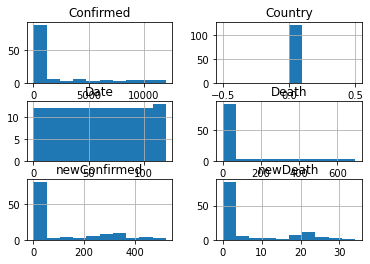

In [28]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

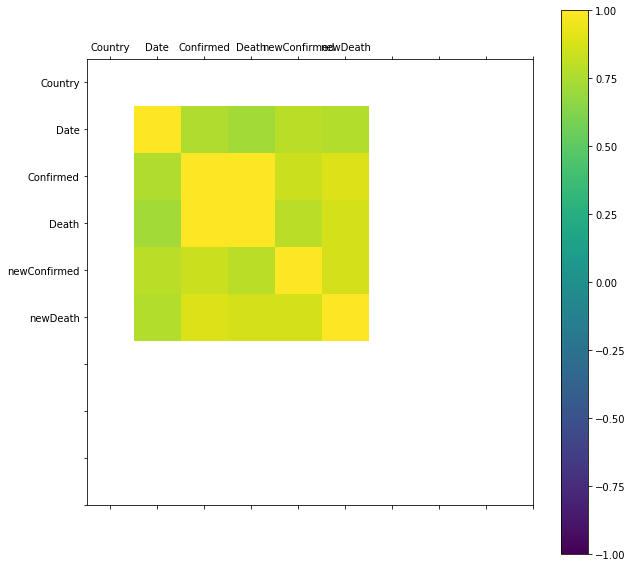

In [29]:
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns.values)
ax.set_yticklabels(data.columns.values)
plt.show()

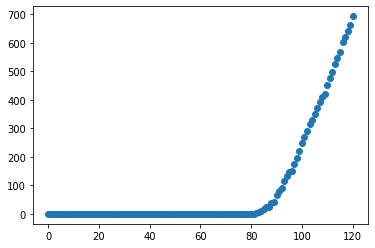

In [30]:
plt.scatter(data['Date'], data['Death'])
plt.show()

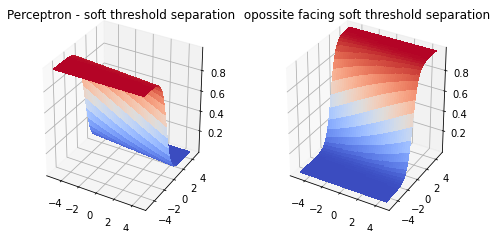

In [31]:
from matplotlib import cm
X1 = np.arange(-5, 5, 0.25)
Y1 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X1, Y1)
X,Y

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Z1=1/(1+np.exp(0.2*X+2*Y)) # two inputs, one output neuron (soft threshold)
Z2=1/(1+np.exp(-0.2*X-2*Y+1)) # oposing face soft threshold
surf = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title('Perceptron - soft threshold separation')

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title(' opossite facing soft threshold separation')
#surf = ax.plot_surface(X, Y, 1/(1+np.exp(Z1+Z2)), cmap=cm.coolwarm,linewidth=0, antialiased=False)

plt.show()

In [33]:
%load_ext watermark

# versiuni de pachete folosite
%watermark -v -m -p pandas,numpy,sklearn,matplotlib,watermark

# date
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.8.2
IPython 7.13.0

pandas 1.0.3
numpy 1.18.2
sklearn 0.0
matplotlib 3.2.1
watermark 2.0.2

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-59-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
 
last updated: Thu Jun 18 2020 21:26:03 EEST
